In [58]:
import pandas as pd
import numpy as mp
import statistics as stat



from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

from matplotlib import pyplot as plt


import imageio
import graphviz
import pydotplus
import io


In [59]:
data = pd.read_csv(r"./Concrete_Data_Yeh.csv")

In [60]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [61]:
features = data.columns
features

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [62]:
features = features.drop('csMPa')
features = list(features)
features

['cement',
 'slag',
 'flyash',
 'water',
 'superplasticizer',
 'coarseaggregate',
 'fineaggregate',
 'age']

In [63]:
#split the dataset into 2 part. one is for train and another is for test
train, test = train_test_split(data, test_size = 0.20)
print("Total Training data: "+ str(len(train)))
print("Total Test data: "+ str(len(test)))

Total Training data: 824
Total Test data: 206


In [64]:
c= DecisionTreeRegressor(min_samples_split = 100)

In [65]:
#assian datasets for traning
x_train = train[features]
y_train = train["csMPa"]
#assian datasets for testing
x_test = test[features]
y_test = test["csMPa"]

In [66]:
#as the output-Y contains percentage so to train in decision tree we have to encode that into unique lebel
dt = c.fit(x_train, y_train.astype(int))

In [67]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)

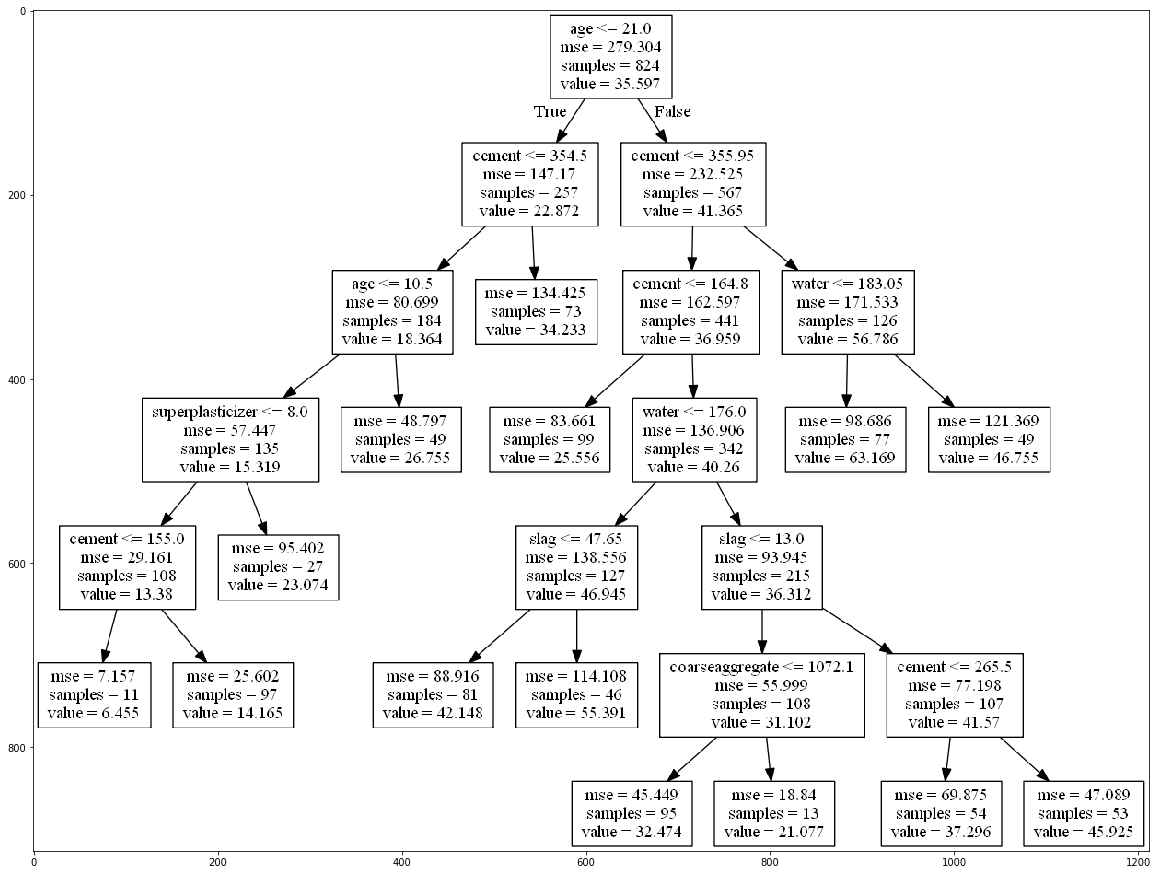

In [68]:
show_tree(dt, features, 'tree.png')

In [69]:
y_pred = dt.predict(x_test)

In [70]:
y_pred

array([37.2962963 , 34.23287671, 34.23287671, 25.55555556, 46.75510204,
       32.47368421, 34.23287671, 46.75510204, 14.16494845, 37.2962963 ,
       34.23287671, 32.47368421, 42.14814815, 34.23287671, 32.47368421,
       23.07407407, 23.07407407, 32.47368421, 42.14814815, 37.2962963 ,
       25.55555556, 45.9245283 , 14.16494845, 42.14814815, 32.47368421,
       32.47368421, 23.07407407, 25.55555556, 63.16883117, 25.55555556,
       26.75510204, 63.16883117,  6.45454545, 37.2962963 , 34.23287671,
       55.39130435, 14.16494845, 45.9245283 , 37.2962963 , 37.2962963 ,
       34.23287671, 26.75510204,  6.45454545, 63.16883117, 14.16494845,
       32.47368421, 25.55555556, 32.47368421, 45.9245283 , 42.14814815,
       14.16494845, 25.55555556, 34.23287671, 23.07407407, 25.55555556,
       23.07407407, 63.16883117, 25.55555556, 25.55555556, 21.07692308,
       46.75510204, 14.16494845, 32.47368421, 26.75510204, 37.2962963 ,
       32.47368421, 46.75510204, 25.55555556, 42.14814815, 34.23

In [72]:
score = accuracy_score(y_test.astype(int), y_pred.astype(int)) * 100
print("Accuracy using desicion Tree: ", round(score, 1), "%" )

avg_acc = stat.mean(y_pred)

print("Average accuracy of test data: "+"{0:.2f}".format(round(avg_acc,2))+" csMPa")


Accuracy using desicion Tree:  5.3 %
Average accuracy of test data: 34.03 csMPa
